<a href="https://colab.research.google.com/github/Rajesh1215/cifar10_tensorflow/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score
import seaborn as sns

In [ ]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

In [ ]:
x_train,x_test=(X_train/255),(X_test/255)
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
Y_train,Y_test=Y_train.reshape(-1,),Y_test.reshape(-1,)

In [ ]:
catogaries=["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Create an ImageDataGenerator for augmentation
# datagen = ImageDataGenerator(
#     width_shift_range=0.2,  # Randomly shift width by up to 20% of the total width
#     height_shift_range=0.2, # Randomly shift height by up to 20% of the total height
#     zoom_range=0.2,         # Randomly zoom in/out by up to 20%
#     horizontal_flip=True,   # Randomly flip images horizontally
#     fill_mode='nearest'     # Fill missing pixels with the nearest available pixel
# )

# # Create a model as you specified


# # Augment the data and concatenate it with the original data
# augmented_x_train = []
# augmented_Y_train = []

# # Number of augmentations per original data point

# for i in range(20000):
#     x_original = x_train[i]
#     y_original = Y_train[i]
#     print(i)


#     augmented_x = datagen.random_transform(x_original)
#     augmented_x_train.append(augmented_x)
#     augmented_Y_train.append(y_original)

# # Convert augmented data to NumPy arrays
# augmented_x_train = np.array(augmented_x_train)
# augmented_Y_train = np.array(augmented_Y_train)

# # Concatenate augmented data with original data
# x_combined_train = np.concatenate((x_train, augmented_x_train), axis=0)
# Y_combined_train = np.concatenate((Y_train, augmented_Y_train), axis=0)

# # Now, x_combined_train and Y_combined_train contain both original and augmented data


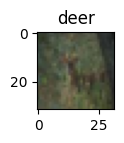

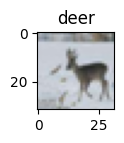

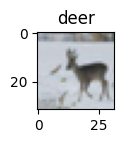

In [ ]:
def showimg(x,y,i):
  plt.figure(figsize=(1,1))
  plt.imshow(x[i])
  plt.title(catogaries[y[i]])


showimg(X_train,Y_train,10)
showimg(X_train,Y_train,20)
showimg(x_train,Y_train,20)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (4, 4), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    BatchNormalization(),  # Batch normalization layer
    Dropout(0.5),  # Dropout layer with 50% dropout rate
    Dense(32, activation="relu"),
    BatchNormalization(),  # Batch normalization layer
    Dropout(0.5),  # Dropout layer with 50% dropout rate
    Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 128)        

In [ ]:
model.compile(optimizer="adam",loss="SparseCategoricalCrossentropy",metrics=["accuracy"])

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
history=model.fit(x_train,Y_train,epochs=25,validation_split=0.1,batch_size=32)

Epoch 1/25
1407/1407 [==============================] - 14s 7ms/step - loss: 1.9398 - accuracy: 0.3104 - val_loss: 1.4380 - val_accuracy: 0.4664
Epoch 2/25
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4916 - accuracy: 0.4592 - val_loss: 1.6143 - val_accuracy: 0.4166
Epoch 3/25
1407/1407 [==============================] - 9s 7ms/step - loss: 1.3321 - accuracy: 0.5294 - val_loss: 1.4918 - val_accuracy: 0.4570
Epoch 4/25
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2382 - accuracy: 0.5651 - val_loss: 1.6322 - val_accuracy: 0.4108
Epoch 5/25
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1611 - accuracy: 0.5989 - val_loss: 1.0798 - val_accuracy: 0.6132
Epoch 6/25
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1011 - accuracy: 0.6223 - val_loss: 1.0448 - val_accuracy: 0.6256
Epoch 7/25
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0517 - accuracy: 0.6403 - val_loss: 0.9329 - val_accura

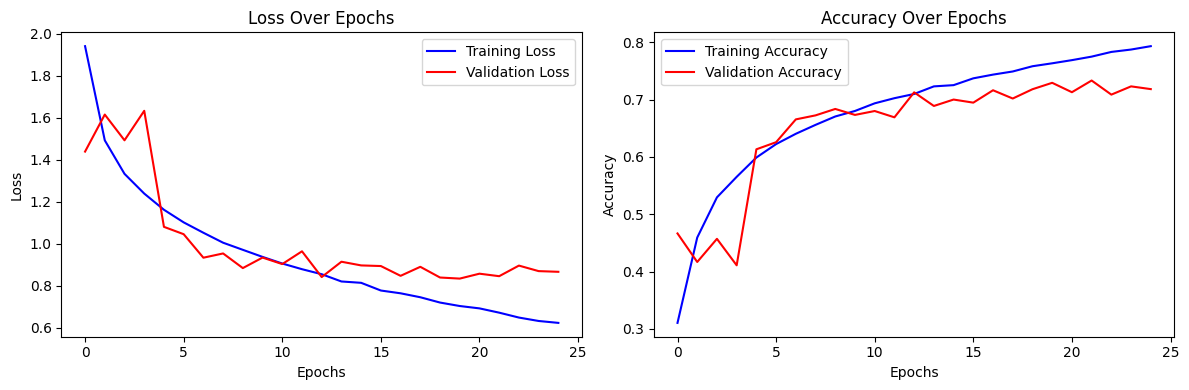

In [ ]:

# Extract training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9031 - accuracy: 0.7149


[0.903107225894928, 0.714900016784668]

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.7149
Precision: 0.7211942317801163
Recall: 0.7149


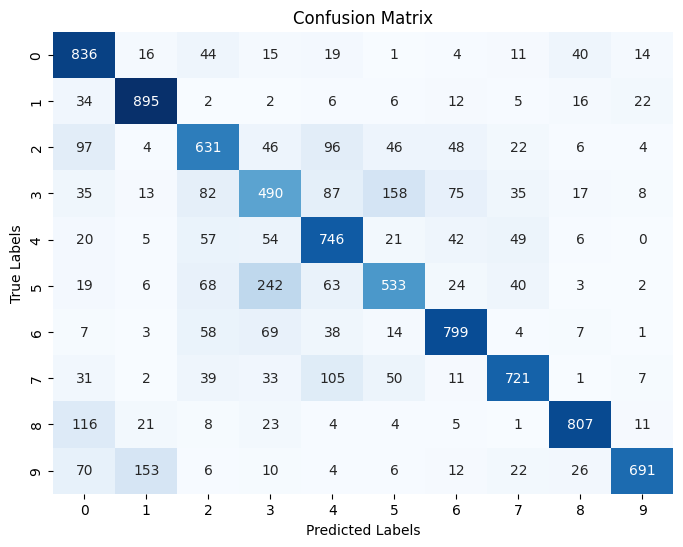

In [ ]:

# Assuming you have the true labels and predicted labels
true_labels = Y_test  # Replace with your actual test labels
predicted_labels = np.argmax(model.predict(x_test), axis=-1)  # Replace with your model's predictions

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Calculate precision and recall
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
accuracy = accuracy_score(true_labels, predicted_labels)

# Print accuracy
print("Accuracy:", accuracy)

# Print precision and recall
print("Precision:", precision)
print("Recall:", recall)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
categories=["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def pre_showimg(x,y,z,i):
  plt.figure(figsize=(1,1))
  plt.imshow(x[i])
  title_str = f"pre: {categories[z[i]]}  ori: {categories[y[i]]}"  # Using f-strings
  plt.title(title_str)

<ipython-input-49-669fa931c494>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(1,1))


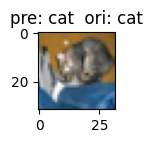

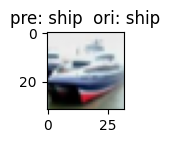

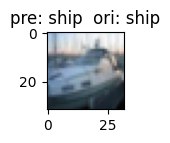

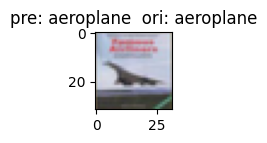

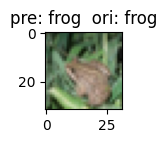

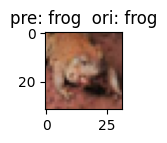

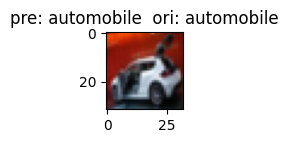

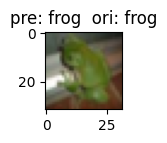

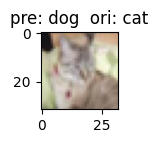

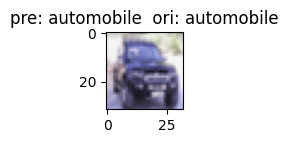

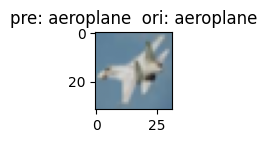

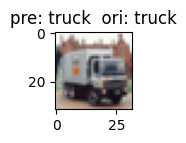

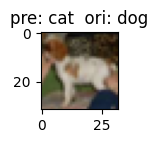

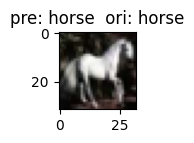

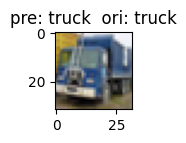

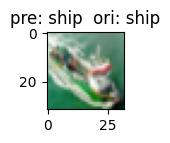

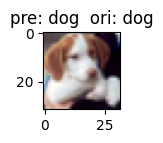

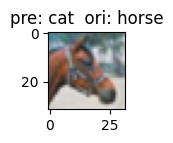

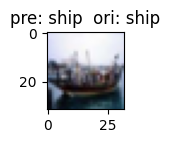

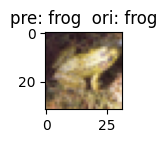

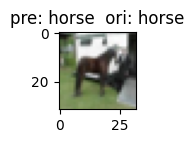

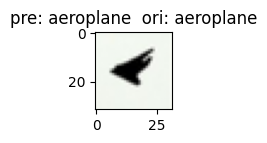

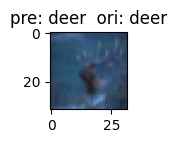

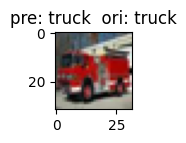

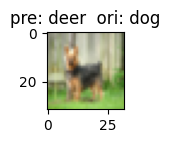

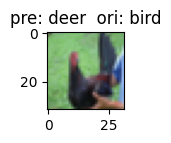

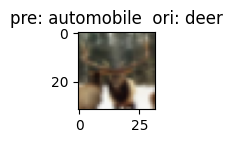

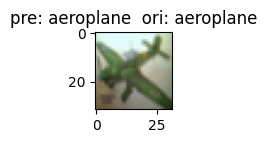

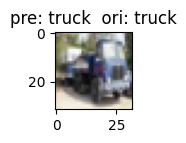

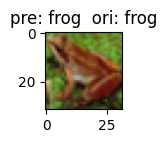

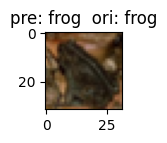

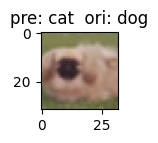

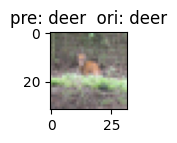

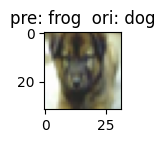

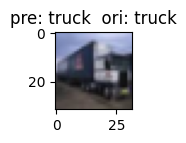

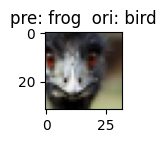

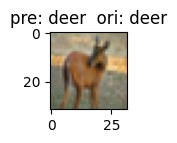

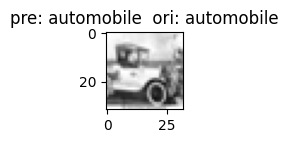

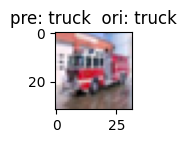

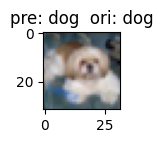

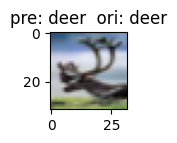

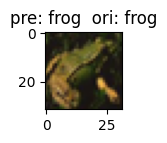

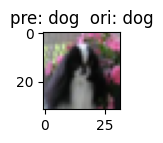

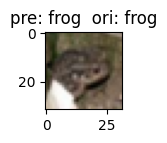

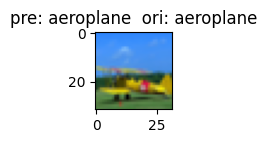

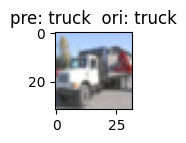

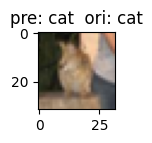

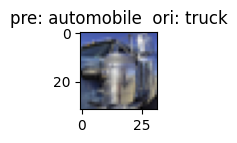

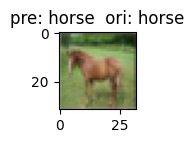

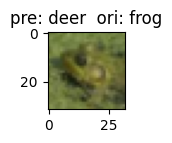

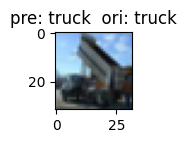

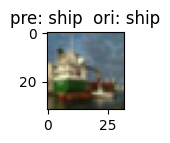

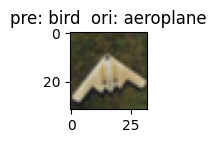

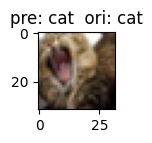

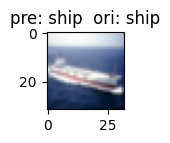

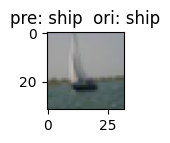

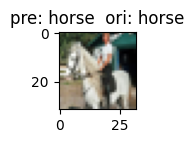

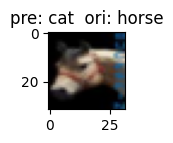

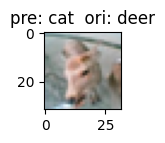

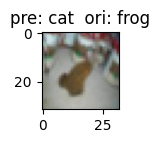

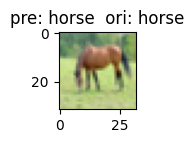

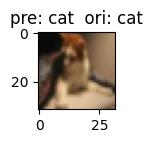

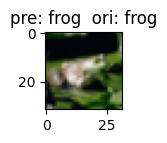

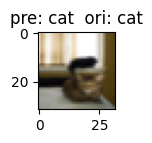

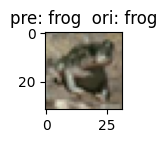

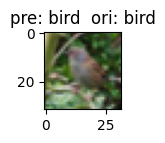

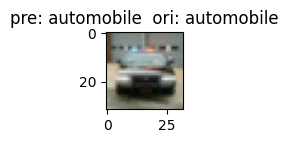

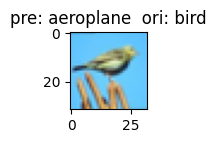

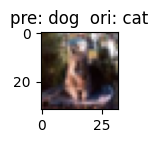

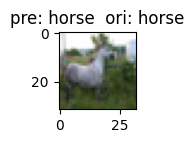

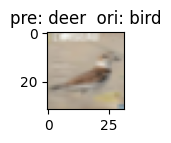

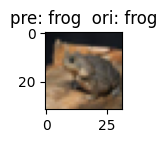

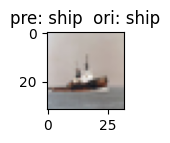

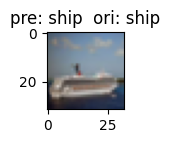

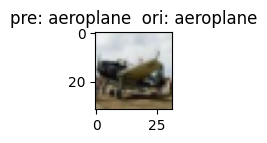

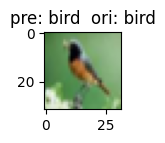

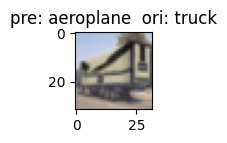

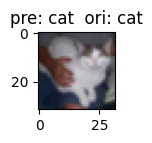

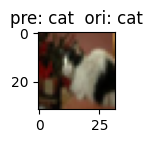

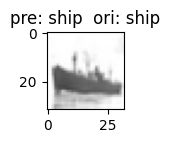

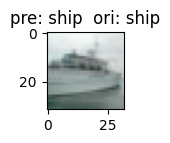

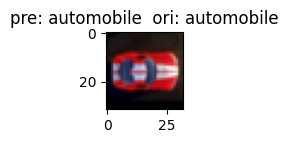

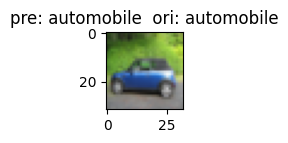

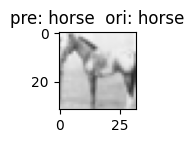

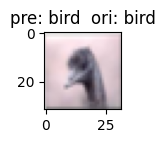

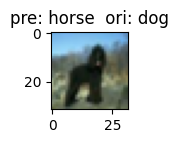

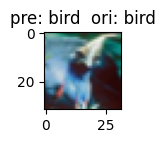

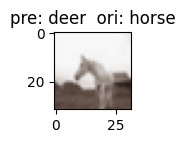

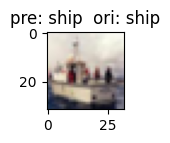

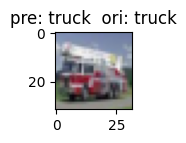

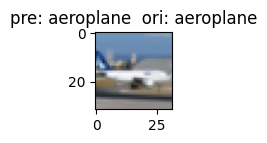

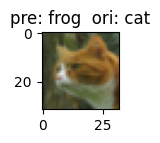

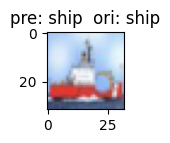

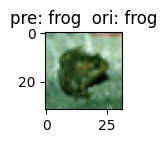

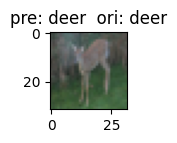

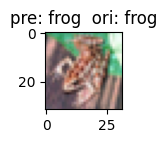

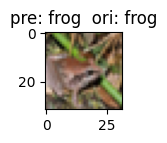

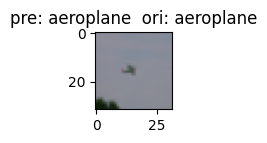

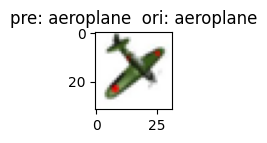

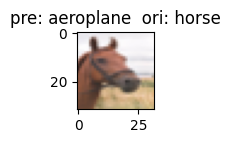

In [ ]:
for x_t in range(0,100):
  pre_showimg(x_test,Y_test,predicted_labels,x_t)

In [ ]:
predicted_labels.shape

(10000,)

In [ ]:
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:

# Assuming Y_train and predicted_labels are 1D NumPy arrays
# Reshape Y_train to be a 2D array with a single column
Y_train_2d = Y_train.reshape(-1, 1)

Y_train_2d.shape

(50000, 1)